In [1]:
#pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url=f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

response = requests.get(query_url + "New York City").json()
response



http://api.openweathermap.org/data/2.5/weather?appid=999fb85742e96c699338def4a2ba44db&units=metric&q=


{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 5.96,
  'feels_like': -0.21,
  'temp_min': 4.44,
  'temp_max': 7.22,
  'pressure': 1026,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 6.17, 'deg': 50},
 'clouds': {'all': 75},
 'dt': 1614530671,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1614511880,
  'sunset': 1614552361},
 'timezone': -18000,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [5]:
data = []
counter = 0

#For loop
for city in cities:
    counter=counter+1
    
    try:
        response = requests.get(query_url + city ).json()
        temp_max= response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        windspeed=response["wind"]["speed"]
        cloudy=response["clouds"]["all"]
        country=response["sys"]["country"]
        date=response["dt"]
        lat=response["coord"]["lat"]
        lon=response["coord"]["lon"]
        data.append([date,city, country, lat, lon, temp_max, humidity,windspeed, cloudy])
        print(f"{counter} {city}")
        time.sleep(.2)
    except:
        print("City not found.")      

  
print("------------------------------\nData Retrieval Complete\n------------------------------")


1 bredasdorp
2 bambous virieux
3 dukhovnitskoye
4 royan
5 ushuaia
City not found.
City not found.
8 tabora
9 punta arenas
10 huilong
11 beringovskiy
12 nikolskoye
13 peniche
14 esperantinopolis
15 hilo
16 yarensk
17 vostok
18 arraial do cabo
19 katakwi
20 gambela
21 cabo san lucas
22 ponta do sol
23 rikitea
24 port hardy
25 barrow
26 shintomi
27 muhororo
28 albany
29 yellowknife
30 nelson bay
31 qaanaaq
32 fort nelson
33 sfantu gheorghe
34 quang ngai
35 bluff
36 cururupu
37 cherskiy
38 yulara
City not found.
40 alexandria
41 vaini
42 cartagena
43 hobart
44 atuona
45 puerto ayora
City not found.
47 east london
48 kirya
49 henties bay
50 amazar
51 mataura
52 khatanga
53 carnarvon
54 hermanus
55 santa cruz
56 tomakomai
57 altay
58 cayenne
59 krasnoselkup
60 baymak
61 bethel
62 busselton
63 tazovskiy
64 cap malheureux
65 plettenberg bay
66 port alfred
67 hearst
68 uyemskiy
69 kodiak
City not found.
71 kapaa
72 songkhla
73 saldanha
74 port elizabeth
75 victoria
76 ariquemes
77 verkhnyaya in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(data,columns=["date","city", "country", "lat", "lon", "temp_max", "humidity","windspeed", "cloudy"])
city_df

,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614530908,bredasdorp,ZA,-34.5322,20.0403,23.00,73,9.26,0
1,1614530908,bambous virieux,MU,-20.3428,57.7575,26.67,78,2.57,75
2,1614530909,dukhovnitskoye,RU,52.4828,48.2137,-15.70,92,3.19,50
3,1614530909,royan,FR,45.6285,-1.0281,15.00,55,5.14,0
4,1614530763,ushuaia,AR,-54.8000,-68.3000,9.00,87,8.75,75
...,...,...,...,...,...,...,...,...,...
560,1614531108,severnyy,RU,50.6770,36.5532,1.00,86,4.00,75
561,1614531109,graaff-reinet,ZA,-32.2522,24.5308,30.00,43,4.11,61
562,1614531109,inhambane,MZ,-23.8650,35.3833,26.00,61,2.57,40
563,1614531110,chalmette,US,29.9427,-89.9634,27.22,73,5.14,90


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
highhumidity = city_df[(city_df["humidity"]>100)].index
highhumidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleancity_df=city_df.drop(highhumidity, inplace=False)
cleancity_df


,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614530908,bredasdorp,ZA,-34.5322,20.0403,23.00,73,9.26,0
1,1614530908,bambous virieux,MU,-20.3428,57.7575,26.67,78,2.57,75
2,1614530909,dukhovnitskoye,RU,52.4828,48.2137,-15.70,92,3.19,50
3,1614530909,royan,FR,45.6285,-1.0281,15.00,55,5.14,0
4,1614530763,ushuaia,AR,-54.8000,-68.3000,9.00,87,8.75,75
...,...,...,...,...,...,...,...,...,...
560,1614531108,severnyy,RU,50.6770,36.5532,1.00,86,4.00,75
561,1614531109,graaff-reinet,ZA,-32.2522,24.5308,30.00,43,4.11,61
562,1614531109,inhambane,MZ,-23.8650,35.3833,26.00,61,2.57,40
563,1614531110,chalmette,US,29.9427,-89.9634,27.22,73,5.14,90


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

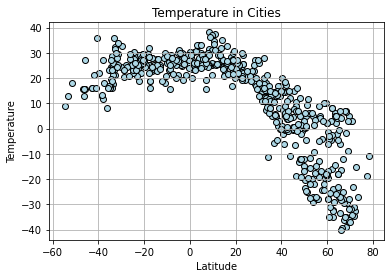

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(cleancity_df["lat"],cleancity_df["temp_max"], marker="o", color="lightblue",edgecolor="black")
plt.title("Temperature in Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#printpng

plt.savefig("Temp_in_cities.png")

## Latitude vs. Humidity Plot

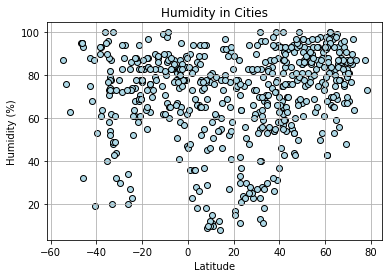

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cleancity_df["lat"],cleancity_df["humidity"], marker="o", color="lightblue",edgecolor="black")
plt.title("Humidity in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#printpng

plt.savefig("Humid_in_cities.png")



## Latitude vs. Cloudiness Plot

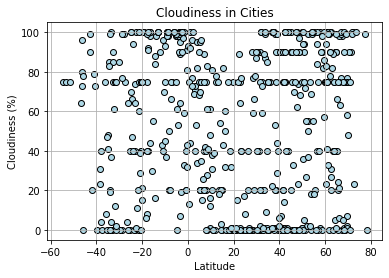

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cleancity_df["lat"],cleancity_df["cloudy"], marker="o", color="lightblue",edgecolor="black")
plt.title("Cloudiness in Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()


#printpng

plt.savefig("Cloudy_in_cities.png")


## Latitude vs. Wind Speed Plot

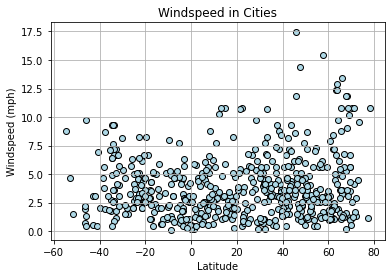

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(cleancity_df["lat"],cleancity_df["windspeed"], marker="o", color="lightblue",edgecolor="black")
plt.title("Windspeed in Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#printpng

plt.savefig("Windy_in_cities.png")


Observation of Scatter Plots



## Linear Regression

In [13]:
northernhem=cleancity_df.loc[cleancity_df["lat"]>=0]
southernhem=cleancity_df.loc[cleancity_df["lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7243760241764189


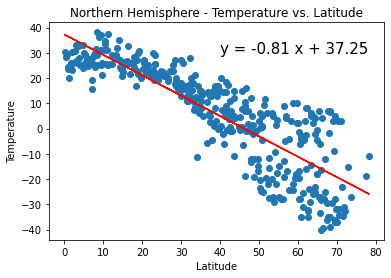

In [22]:
x_values = northernhem["lat"]
y_values = northernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22017994867524118


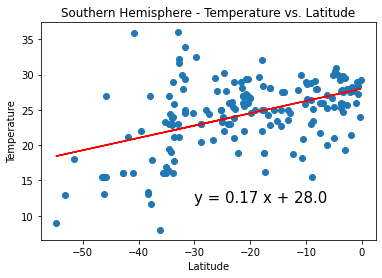

In [15]:
x_values = southernhem["lat"]
y_values = southernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15)
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17151579213813886


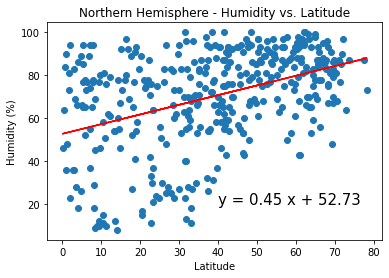

In [24]:
x_values = northernhem["lat"]
y_values = northernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Observation of Temperature


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012798888903691494


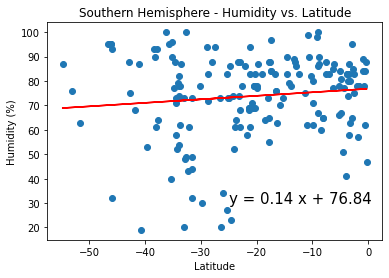

The r-squared is: 0.012798888903691494


In [26]:
x_values = southernhem["lat"]
y_values = southernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Humidity



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03245493899113595


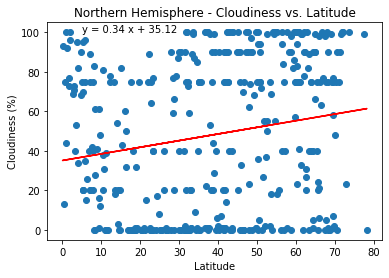

In [29]:
x_values = northernhem["lat"]
y_values = northernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,100),fontsize=10)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07363189768635767


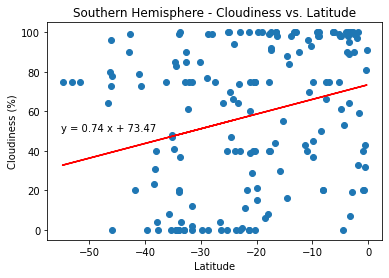

In [32]:
x_values = southernhem["lat"]
y_values = southernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=10)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02533818739579754


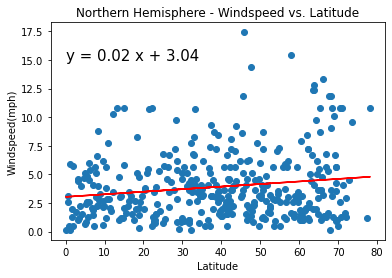

In [33]:
x_values = northernhem["lat"]
y_values = northernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15)
plt.title("Northern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05928487337284611


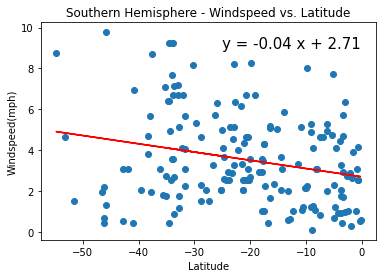

In [34]:
x_values = southernhem["lat"]
y_values = southernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15)
plt.title("Southern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Windspeed

